# Adult Census Income Classification

The main objective of this classification is to create a machine learning model that can classify adult census income if income is more than 50k or less than 50k per year.

Parameters of this dataset:
- age               
- workclass         
- fnlwgt            
- education         
- education.num     
- marital.status    
- occupation        
- relationship      
- race              
- sex               
- capital.gain      
- capital.loss      
- hours.per.week    
- native.country    
- income (label)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Data Preparesation

### Read Data

In [2]:
# Read a dataset
file_path = '../work2/data/adult.csv'
income_data = pd.read_csv(file_path)

# Show sample data
income_data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Handle Missing Values

In [3]:
# Check infomation of data
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Check shape
income_data.shape

(32561, 15)

In [5]:
# Check basic stat
income_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Check missing values
income_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

This result shows this the dataset doesn't have missing values. But ? in the workclass column is our missing values.

In [7]:
# Replace all ? with nan, then check missing again.
income_data.replace('?', np.nan, inplace=True)

In [8]:
# Missing values show up, I decided to replace with mode.
income_data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
# Replace with mode value of cols
missing_features = ['workclass', 'occupation', 'native.country']
income_data[missing_features] = income_data[missing_features].fillna(value= income_data.mode().iloc[0])

### Exploration Data

In [10]:
# Encoding our label to binary class
income_data['income'] = income_data['income'].map({'<=50K': 0, '>50K': 1})

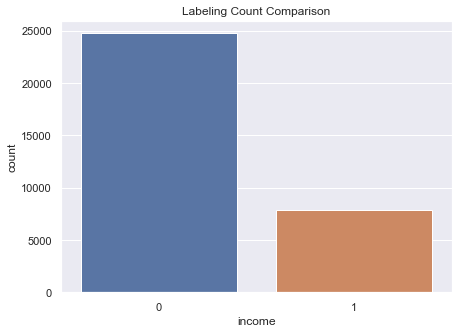

In [11]:
# Plot label
plt.figure(figsize=(7, 5))
plt.title('Labeling Count Comparison')
sns.countplot(data=income_data, x='income', label='count')
plt.show()

The visualization shows our labels are imbalance class.

Next, let see features correlation.

In [12]:
income_data.corr()['income'].sort_values()

fnlwgt           -0.009463
capital.loss      0.150526
capital.gain      0.223329
hours.per.week    0.229689
age               0.234037
education.num     0.335154
income            1.000000
Name: income, dtype: float64

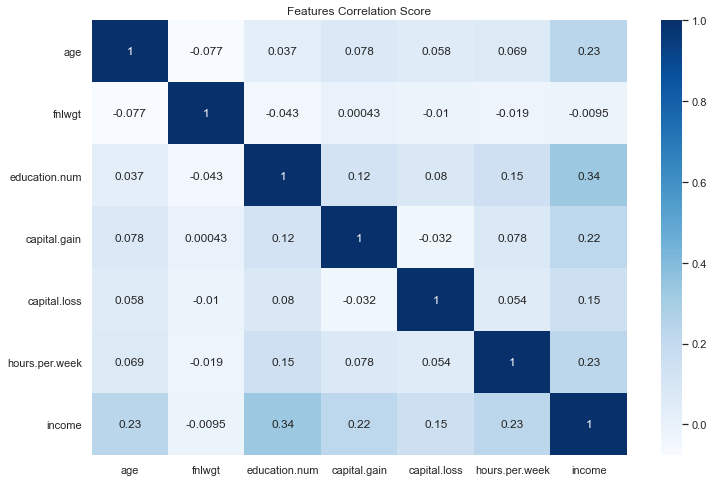

In [13]:
plt.figure(figsize=(12, 8))
plt.title('Features Correlation Score')
sns.heatmap(data= income_data.corr(), cmap='Blues', annot=True)
plt.show()

From the correlation, let see about age and hours.per.week. 

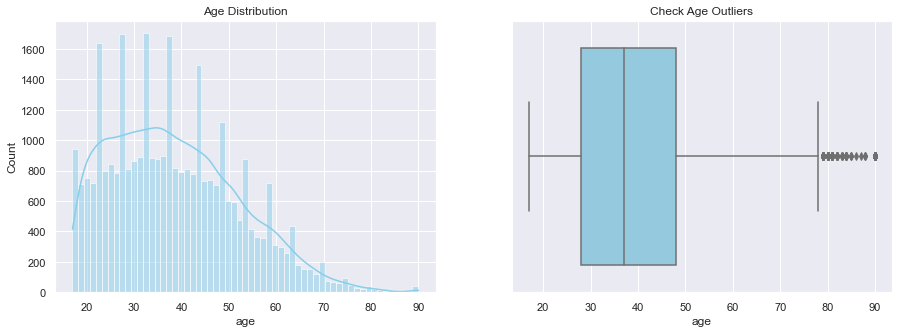

In [21]:
#age_skew = income_data['age'].skew()

fig1, ax1 = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=income_data['age'], color='skyblue', kde=True, ax=ax1[0]).set(title= 'Age Distribution')
sns.boxplot(data=income_data, x='age', color='skyblue', ax=ax1[1]).set(title= 'Check Age Outliers')
plt.show()

In [15]:
# Check quarter of age
age_q1 = income_data['age'].quantile(0.25)
age_q2 = income_data['age'].quantile(0.50)
age_q3 = income_data['age'].quantile(0.75)
age_q4 = income_data['age'].quantile(1.00)
age_iqr = age_q3 - age_q1


print(f'Quartile 1 Age: {age_q1}')
print(f'Quartile 2 Age: {age_q2}')
print(f'Quartile 3 Age: {age_q3}')
print(f'Quartile 4 Age: {age_q4}')
print(f'Upper outliers: {age_q3+1.5*age_iqr}')

Quartile 1 Age: 28.0
Quartile 2 Age: 37.0
Quartile 3 Age: 48.0
Quartile 4 Age: 90.0
Upper outliers: 78.0


From quartile and upper outliers, I decide to cut age feature into age group.

In [16]:
tmp = pd.cut(income_data['age'], bins = [0, 35, 50, 100], labels = ['Young Adult', 'Middle Adult', 'Older Adult'])

In [17]:
tmp.value_counts(sort=False)

Young Adult     14925
Middle Adult    11176
Older Adult      6460
Name: age, dtype: int64

In [18]:
# Change age into age group
income_data['age'] = pd.cut(income_data['age'], bins = [0, 35, 50, 100], labels = ['Young Adult', 'Middle Adult', 'Older Adult'])

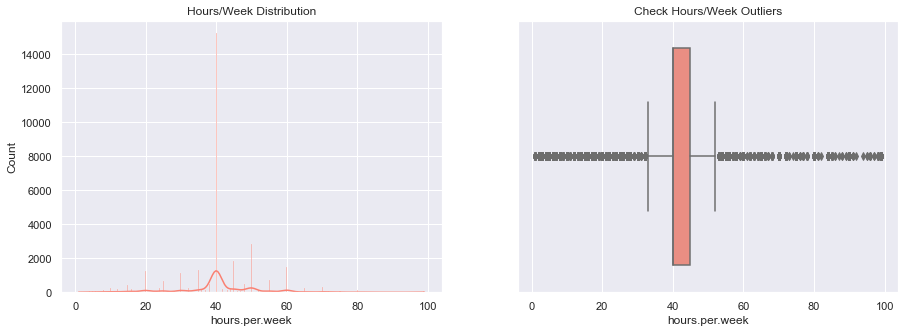

In [23]:
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=income_data['hours.per.week'], color='salmon', kde=True, ax=ax2[0]).set(title= 'Hours/Week Distribution')
sns.boxplot(data=income_data, x='hours.per.week', color='salmon', ax=ax2[1]).set(title= 'Check Hours/Week Outliers')
plt.show()

In [20]:
# Check quarter of hours/week
h_q1 = income_data['hours.per.week'].quantile(0.25)
h_q2 = income_data['hours.per.week'].quantile(0.50)
h_q3 = income_data['hours.per.week'].quantile(0.75)
h_q4 = income_data['hours.per.week'].quantile(1.00)
h_iqr = h_q3 - h_q1

print(f'Quartile 1 Hours/Week: {h_q1}')
print(f'Quartile 2 Hours/Week: {h_q2}')
print(f'Quartile 3 Hours/Week: {h_q3}')
print(f'Quartile 4 Hours/Week: {h_q4}')
print(f'Upper outliers: {h_q3+1.5*h_iqr}')

Quartile 1 Hours/Week: 40.0
Quartile 2 Hours/Week: 40.0
Quartile 3 Hours/Week: 45.0
Quartile 4 Hours/Week: 99.0
Upper outliers: 52.5


From quartile and upper outliers, I decide to cut hours per week feature into work time group.

In [21]:
tmp = pd.cut(income_data['hours.per.week'], bins = [0, 30, 40, 100], labels = ['Less Hours', 'Normal Hours', 'Extra Hours'])

In [22]:
tmp.value_counts(sort=False)

Less Hours       5245
Normal Hours    17735
Extra Hours      9581
Name: hours.per.week, dtype: int64

In [23]:
# Change into work time group
income_data['hours.per.week'] = pd.cut(income_data['hours.per.week'], bins = [0, 30, 40, 100], labels = ['Less Hours', 'Normal Hours', 'Extra Hours'])

Build visualization about age group and work time qroup with income data.

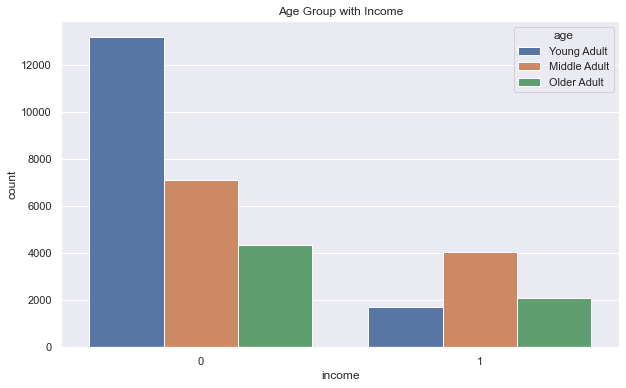

In [24]:
# plot income compare with age group, class 0: <=50K, 0: >50K
plt.figure(figsize=(10, 6))
plt.title('Age Group with Income')
ax3 = sns.countplot(data=income_data, x='income', hue='age')
plt.show()

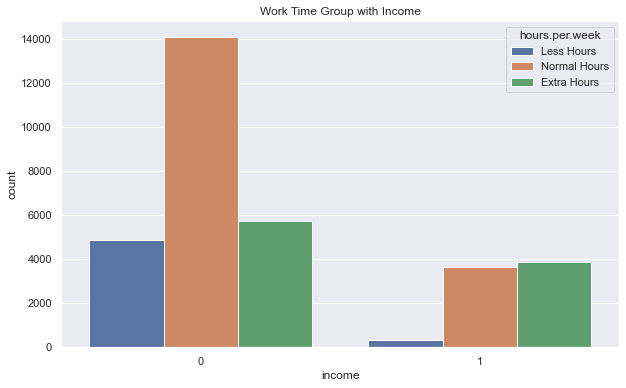

In [25]:
# plot income compare with work time group
plt.figure(figsize=(10, 6))
plt.title('Work Time Group with Income')
ax3 = sns.countplot(data=income_data, x='income', hue='hours.per.week')
plt.show()

## Build Classification Model

### Data Transformation

Data transformation does as following these methods.
- Label encoder with categorical data
- Use oversampling to handle imbalanced data
- Do Normalization to data

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [27]:
# Find categorical features
cat_features = list(income_data.select_dtypes(include=['object', 'category']).columns)

# Transform categorical features with label encoder
le = LabelEncoder()

income_data[cat_features] = income_data[cat_features].apply(le.fit_transform)

In [28]:
# Show sample
income_data.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8078,0,4,286750,14,15,2,9,0,2,1,0,0,0,38,1
12676,0,1,269733,11,9,5,7,1,4,1,0,0,2,38,0
28835,2,3,48121,11,9,4,5,3,4,1,0,0,2,38,0
19747,0,5,149943,14,15,2,9,0,1,1,0,0,0,35,1
10085,2,5,24961,11,9,2,4,0,4,1,0,0,0,38,0


In [29]:
# Drop label and unused feature, I think, don't need to use fnlwgt.
X = income_data.drop(columns= ['income', 'fnlwgt'])
Y = income_data['income']

# Split train test
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3, random_state=17)

I used SMOTE (Synthetic Minority Oversampling Technique) to handle imbalanced data.

In [30]:
# Do Oversampling
smote = SMOTE(random_state = 7)
xTrainRes, yTrainRes = smote.fit_resample(xTrain, yTrain)

In [31]:
print(f'Training Shape Before Resample: {xTrain.shape}')
print(f'Class 0 Shape Before Resample: {sum(yTrain == 0)}')
print(f'Class 1 Shape Before Resample: {sum(yTrain == 1)}')
print('')
print(f'Training Shape Before Resample: {xTrainRes.shape}')
print(f'Class 0 Shape Before Resample: {sum(yTrainRes == 0)}')
print(f'Class 1 Shape Before Resample: {sum(yTrainRes == 1)}')

Training Shape Before Resample: (22792, 13)
Class 0 Shape Before Resample: 17240
Class 1 Shape Before Resample: 5552

Training Shape Before Resample: (34480, 13)
Class 0 Shape Before Resample: 17240
Class 1 Shape Before Resample: 17240


In [32]:
# Scaling data with min-max norm
scaler = MinMaxScaler() 
# scaler = StandardScaler()

scale_xTrain = scaler.fit_transform(xTrainRes) 
# scale_xTrain = scaler.fit_transform(xTrain) 
scale_xTest = scaler.fit_transform(xTest)

### Naive Bayes Model

#### Build Model

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
# Build naive bayes model
gaussian = GaussianNB()

nb_model = gaussian.fit(scale_xTrain, yTrainRes)

#### Evaluate Model

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score ,accuracy_score, recall_score, precision_score

In [36]:
# Set class name
class_names = ['Less than 50K', 'More than 50K']

# Preidct data
yPred = nb_model.predict(scale_xTest)

In [37]:
print(f'Accuracy: {accuracy_score(yTest, yPred)*100:.4f}')
print(f'Recall: {recall_score(yTest, yPred)*100:.4f}')
print(f'F1-score: {precision_score(yTest, yPred)*100:.4f}')
print(f'Precision: {f1_score(yTest, yPred)*100:.4f}')

Accuracy: 81.2775
Recall: 50.6335
F1-score: 62.3789
Precision: 55.8958


In [38]:
print(classification_report(yTest, yPred, target_names=class_names, digits=2))

               precision    recall  f1-score   support

Less than 50K       0.86      0.91      0.88      7480
More than 50K       0.62      0.51      0.56      2289

     accuracy                           0.81      9769
    macro avg       0.74      0.71      0.72      9769
 weighted avg       0.80      0.81      0.81      9769



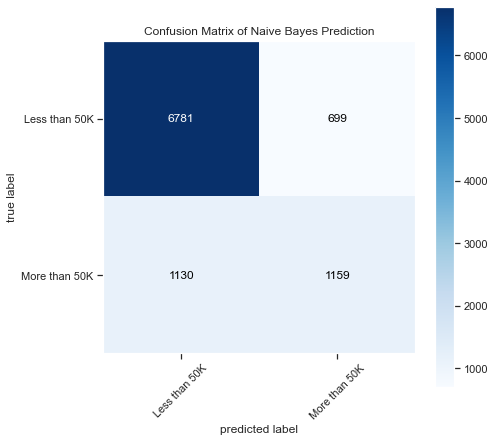

In [39]:
# Plot cm matrix
mat = confusion_matrix(yTest, yPred)
fig4 , ax4 = plot_confusion_matrix(conf_mat= mat, figsize=(7,7),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of Naive Bayes Prediction')
plt.show()

### XGB Classifier Model

#### Build Model

In [40]:
from xgboost import XGBClassifier

In [41]:
# Build xgb classify
xgb_classify = XGBClassifier(n_estimators = 500, 
                             learning_rate = 0.05,
                             use_label_encoder = False,
                             eval_metric = 'logloss',
                             n_jobs = -1)

In [42]:
xgb_model = xgb_classify.fit(scale_xTrain, yTrainRes,
                             # eval_set = [(xVal, yVal)],
                             verbose = 2)

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Set hyperparameter
n_estimators = [int(x) for x in np.linspace(100, 500, 10)]
max_depth = [int(x) for x in np.linspace(2, 15, 6)]
max_leaves = [int(x) for x in np.linspace(2, 10, 6)]
min_child_weight = [1, 3, 5, 7, 9]
learning_rate = [0.01, 0.05, 0.09]
    'objective': ['reg:squarederror', 'reg:tweedie']

In [44]:
# Get parms into dict
param_grid = {'n_estimators': n_estimators, 
              'max_depth': max_depth,
              'max_leaves': max_leaves,
              'min_child_weight': min_child_weight,
              'learning_rate': learning_rate}

In [45]:
# Blank XGBoost
xgb_blank = XGBClassifier()

# Setting grid search
xgb_randGrid = RandomizedSearchCV(estimator= xgb_blank,
                                    param_distributions= param_grid,
                                    scoring= 'accuracy',
                                    n_iter= 100,
                                    cv= 10,
                                    n_jobs= -1,
                                    verbose= 2)

In [46]:
# Tuning Model, Careful take to much time.
xgb_randGrid.fit(scale_xTrain, yTrainRes)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [74]:
# Set of best hyperparms
xgb_randGrid.best_params_

{'n_estimators': 500,
 'min_child_weight': 1,
 'max_leaves': 8,
 'max_depth': 15,
 'learning_rate': 0.05}

In [81]:
# Get hyperparms tuning model
# xgb_tuning = xgb_randGrid.best_estimator_
xgb_tuning = XGBClassifier(n_estimators= 500, 
                           min_child_weight= 1,
                           max_leaves= 8,
                           max_depth= 15,
                           learning_rate= 0.05)

xgb_tuningModel = xgb_tuning.fit(scale_xTrain, yTrainRes)

#### Evaluate Model

In [47]:
# Preidct data
yPred = xgb_model.predict(scale_xTest)

In [48]:
print(f'Accuracy: {accuracy_score(yTest, yPred)*100:.4f}')
print(f'Recall: {recall_score(yTest, yPred)*100:.4f}')
print(f'F1-score: {precision_score(yTest, yPred)*100:.4f}')
print(f'Precision: {f1_score(yTest, yPred)*100:.4f}')

Accuracy: 83.2941
Recall: 84.1415
F1-score: 60.2817
Precision: 70.2407


In [49]:
print(classification_report(yTest, yPred, target_names=class_names, digits=2))

               precision    recall  f1-score   support

Less than 50K       0.94      0.83      0.88      7480
More than 50K       0.60      0.84      0.70      2289

     accuracy                           0.83      9769
    macro avg       0.77      0.84      0.79      9769
 weighted avg       0.86      0.83      0.84      9769



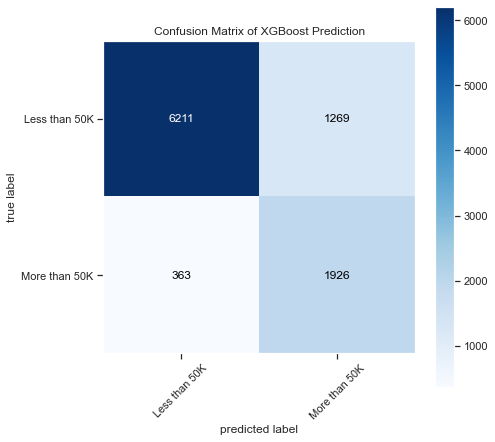

In [50]:
# Plot cm matrix
mat = confusion_matrix(yTest, yPred)
fig5 , ax5 = plot_confusion_matrix(conf_mat= mat, figsize=(7,7),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of XGBoost Prediction')
plt.show()

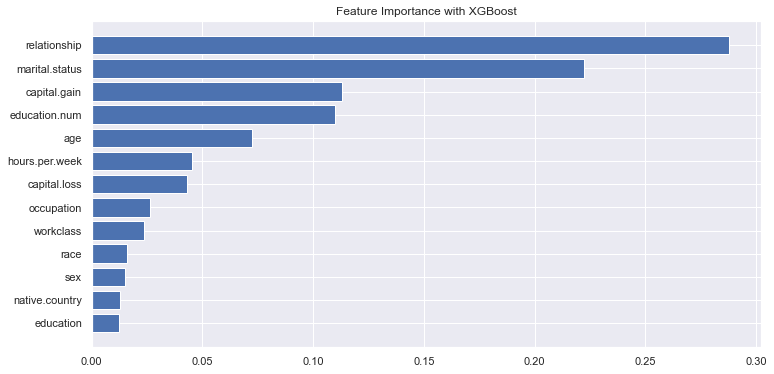

In [71]:
sorted_index = xgb_model.feature_importances_.argsort()

plt.figure(figsize=(12, 6))
plt.barh(X.columns[sorted_index], xgb_model.feature_importances_[sorted_index])
plt.title("Feature Importance with XGBoost")
plt.show()

#### Evaluate Tuning Model

In [82]:
# Preidct data
yPred = xgb_tuningModel.predict(scale_xTest)

In [83]:
print(f'Accuracy: {accuracy_score(yTest, yPred)*100:.4f}')
print(f'Recall: {recall_score(yTest, yPred)*100:.4f}')
print(f'F1-score: {precision_score(yTest, yPred)*100:.4f}')
print(f'Precision: {f1_score(yTest, yPred)*100:.4f}')

Accuracy: 82.9870
Recall: 81.6077
F1-score: 60.0836
Precision: 69.2108


In [84]:
print(classification_report(yTest, yPred, target_names=class_names, digits=2))

               precision    recall  f1-score   support

Less than 50K       0.94      0.83      0.88      7480
More than 50K       0.60      0.82      0.69      2289

     accuracy                           0.83      9769
    macro avg       0.77      0.83      0.79      9769
 weighted avg       0.86      0.83      0.84      9769



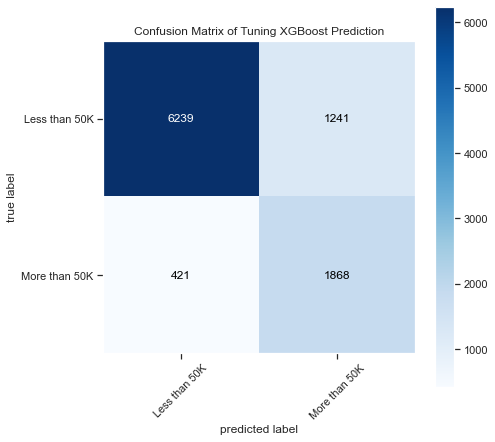

In [85]:
# Plot cm matrix
mat = confusion_matrix(yTest, yPred)
fig6 , ax6 = plot_confusion_matrix(conf_mat= mat, figsize=(7,7),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of Tuning XGBoost Prediction')
plt.show()

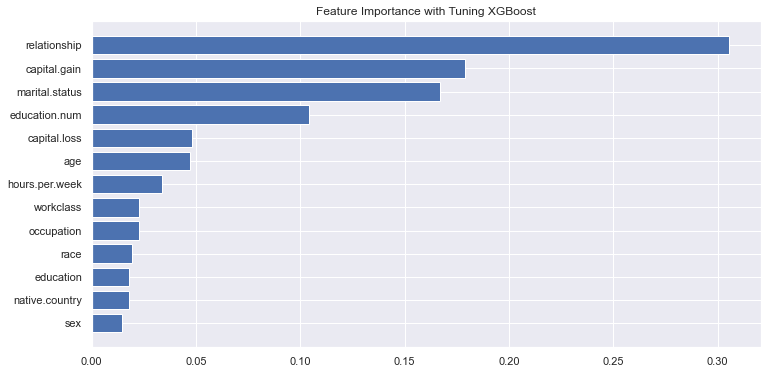

In [86]:
sorted_index = xgb_tuningModel.feature_importances_.argsort()

plt.figure(figsize=(12, 6))
plt.barh(X.columns[sorted_index], xgb_tuningModel.feature_importances_[sorted_index])
plt.title("Feature Importance with Tuning XGBoost")
plt.show()

### Logistic Regression Model

#### Build Model

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
# Build model
lr = LogisticRegression()

lr_model = lr.fit(scale_xTrain, yTrainRes)

#### Evaluate Model

In [54]:
# Preidct data
yPred = lr_model.predict(scale_xTest)

In [55]:
print(f'Accuracy: {accuracy_score(yTest, yPred)*100:.4f}')
print(f'Recall: {recall_score(yTest, yPred)*100:.4f}')
print(f'F1-score: {precision_score(yTest, yPred)*100:.4f}')
print(f'Precision: {f1_score(yTest, yPred)*100:.4f}')

Accuracy: 75.8317
Recall: 76.4963
F1-score: 48.9927
Precision: 59.7305


In [56]:
print(classification_report(yTest, yPred, target_names=class_names, digits=2))

               precision    recall  f1-score   support

Less than 50K       0.91      0.76      0.83      7480
More than 50K       0.49      0.76      0.60      2289

     accuracy                           0.76      9769
    macro avg       0.70      0.76      0.71      9769
 weighted avg       0.81      0.76      0.77      9769



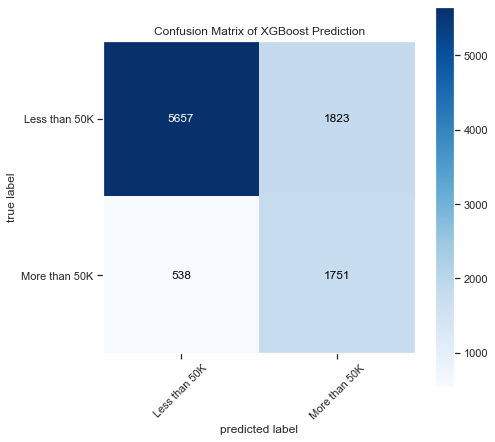

In [57]:
# Plot cm matrix
mat = confusion_matrix(yTest, yPred)
fig6 , ax6 = plot_confusion_matrix(conf_mat= mat, figsize=(7,7),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of XGBoost Prediction')
plt.show()

### ROC Curve

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve

In [94]:
# Random prop
r_prop = [0 for _ in range(len(scale_xTest))]

# Get predict prop
nb_prop = nb_model.predict_proba(scale_xTest)[:, 1]
xgb_prop = xgb_model.predict_proba(scale_xTest)[:, 1]
lr_prop = lr_model.predict_proba(scale_xTest)[:, 1]

# tuning prop
tuning_prop = xgb_tuningModel.predict_proba(scale_xTest)[:, 1]

In [95]:
# Calculate Auc Score
nb_rocAuc = roc_auc_score(yTest, nb_prop)
xgb_rocAuc = roc_auc_score(yTest, xgb_prop)
lr_rocAuc = roc_auc_score(yTest, lr_prop)
r_rocAuc = roc_auc_score(yTest, r_prop) # Random
tuning_rocAuc = roc_auc_score(yTest, tuning_prop) # base xgboost better

# Calculate ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(yTest, nb_prop)
xgb_fpr, xgb_tpr, _ = roc_curve(yTest, xgb_prop)
lr_fpr, lr_tpr, _ = roc_curve(yTest, lr_prop)
r_fpr, r_tpr, _ = roc_curve(yTest, r_prop)
tuning_fpr, tuning_tpr, _ = roc_curve(yTest, tuning_prop)

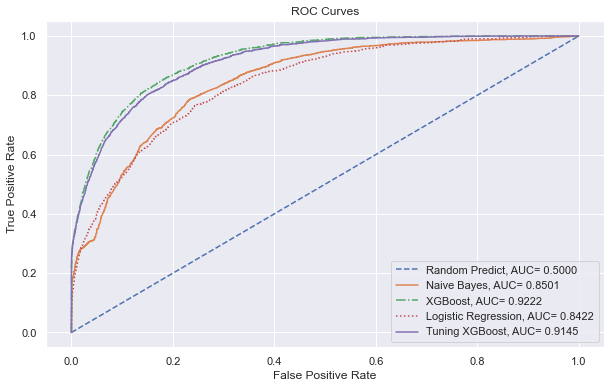

In [99]:
# plot curve
plt.figure(figsize=(10, 6))
plt.title('ROC Curves')

plt.plot(r_fpr, r_tpr, label= f'Random Predict, AUC= {r_rocAuc:.4f}', linestyle='--')
plt.plot(nb_fpr, nb_tpr, label= f'Naive Bayes, AUC= {nb_rocAuc:.4f}', linestyle='-')
plt.plot(xgb_fpr, xgb_tpr, label= f'XGBoost, AUC= {xgb_rocAuc:.4f}', linestyle='-.')
plt.plot(lr_fpr, lr_tpr, label= f'Logistic Regression, AUC= {lr_rocAuc:.4f}', linestyle=':')
plt.plot(tuning_fpr, tuning_tpr, label= f'Tuning XGBoost, AUC= {tuning_rocAuc:.4f}', linestyle='-')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Save Model

In [88]:
import joblib

In [89]:
# nb model
joblib.dump(nb_model, '../work2/model/nb_model.joblib')

['../work2/model/nb_model.joblib']

In [90]:
# xgboost model
joblib.dump(xgb_model, '../work2/model/xgb_model.joblib')

['../work2/model/xgb_model.joblib']

In [91]:
# lr model
joblib.dump(lr_model, '../work2/model/lr_model.joblib')

['../work2/model/lr_model.joblib']

In [92]:
# tuning xgboost
joblib.dump(xgb_tuningModel, '../work2/model/xgb_tuningModel.joblib')

['../work2/model/xgb_tuningModel.joblib']